In [1]:
%matplotlib inline

import pymor.tools.random
pymor.tools.random._default_random_state = None

from IPython import get_ipython
ip = get_ipython()
if ip is not None:
    ip.run_line_magic('load_ext', 'pymor.discretizers.builtin.gui.jupyter')

The pymor.discretizers.builtin.gui.jupyter extension is already loaded. To reload it, use:
  %reload_ext pymor.discretizers.builtin.gui.jupyter


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.sparse as sps
from pymor.models.iosys import LTIModel
from pymor.reductors.bt import BTReductor

plt.rcParams['axes.grid'] = True

In [3]:
k = 50
n = 2 * k + 1

A = sps.diags(
    [(n - 1) * [(n - 1)**2], n * [-2 * (n - 1)**2], (n - 1) * [(n - 1)**2]],
    [-1, 0, 1],
    format='lil',
)
A[0, 0] = A[-1, -1] = -2 * n * (n - 1)
A[0, 1] = A[-1, -2] = 2 * (n - 1)**2
A = A.tocsc()

B = np.zeros((n, 2))
B[:, 0] = 1
B[0, 1] = 2 * (n - 1)

C = np.zeros((3, n))
C[0, 0] = C[1, k] = C[2, -1] = 1

In [4]:
fom = LTIModel.from_matrices(A, B, C)

In [5]:
fom

LTIModel(
    NumpyMatrixOperator(<101x101 sparse, 301 nnz>, source_id='STATE', range_id='STATE'),
    NumpyMatrixOperator(<101x2 dense>, range_id='STATE'),
    NumpyMatrixOperator(<3x101 dense>, source_id='STATE'),
    D=ZeroOperator(NumpyVectorSpace(3), NumpyVectorSpace(2)),
    E=IdentityOperator(NumpyVectorSpace(101, id='STATE')))

In [6]:
print(fom)

LTIModel
    class: LTIModel
    number of equations: 101
    number of inputs:    2
    number of outputs:   3
    continuous-time
    linear time-invariant
    solution_space:  NumpyVectorSpace(101, id='STATE')


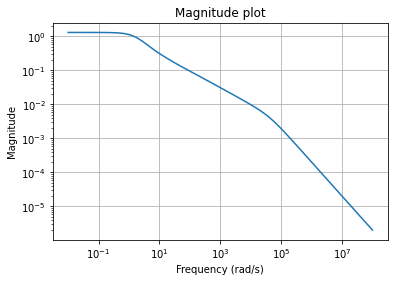

In [7]:
w = np.logspace(-2, 8, 50)
_ = fom.mag_plot(w)

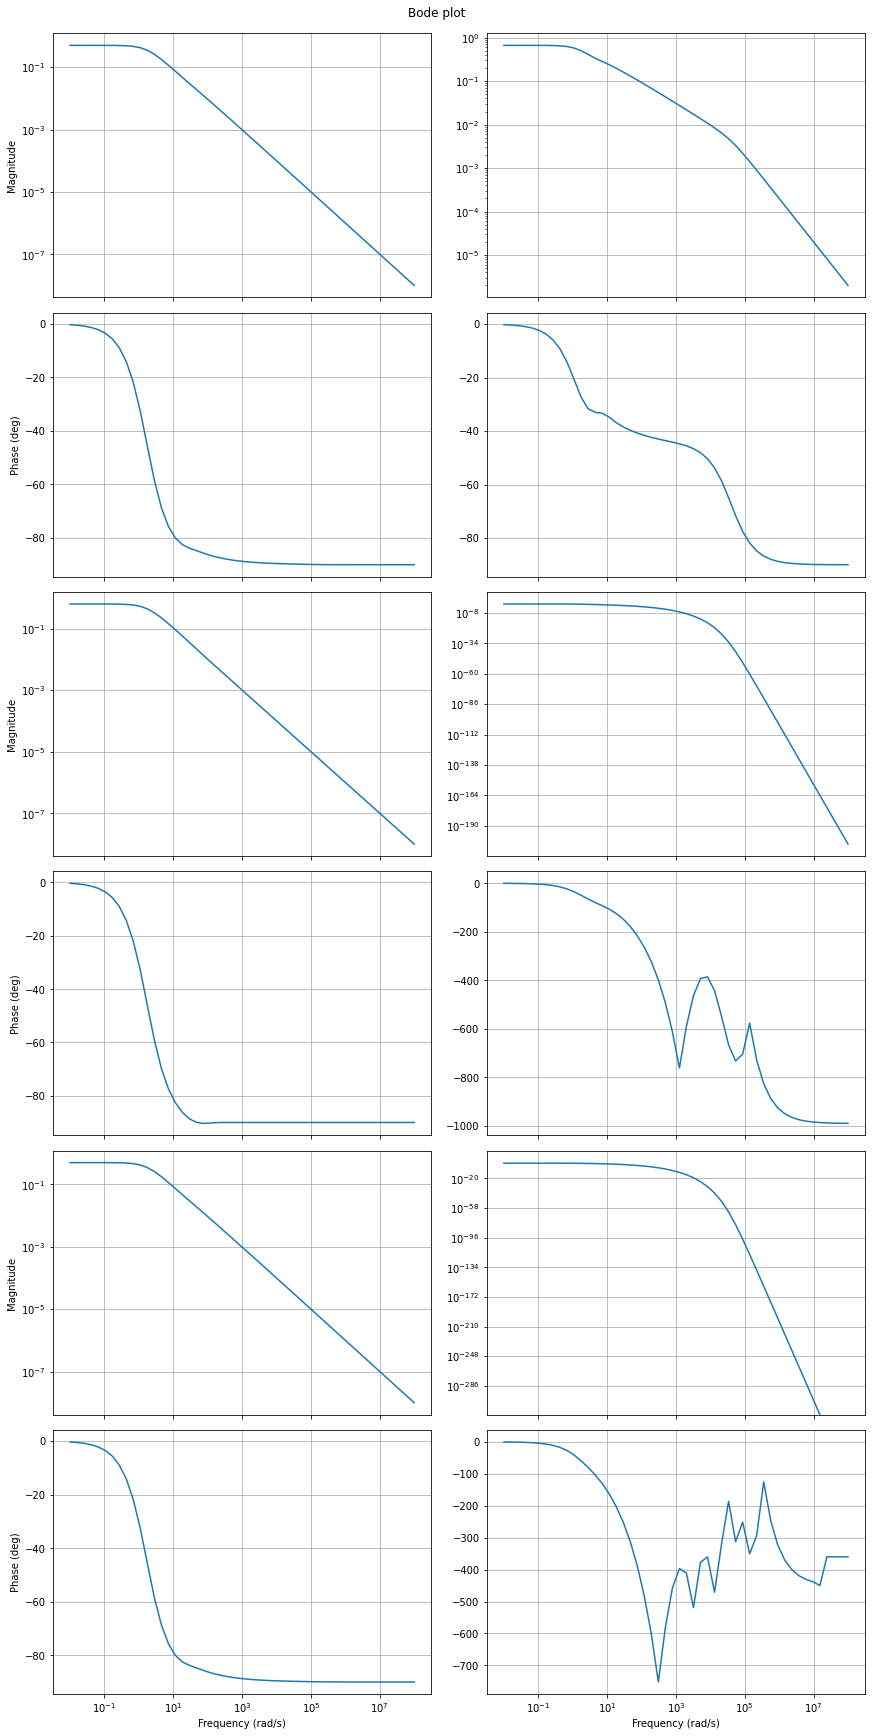

In [8]:
_ = fom.bode_plot(w)

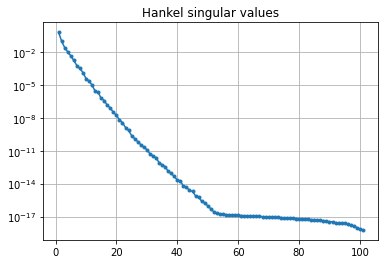

In [9]:
hsv = fom.hsv()
fig, ax = plt.subplots()
ax.semilogy(range(1, len(hsv) + 1), hsv, '.-')
_ = ax.set_title('Hankel singular values')

In [10]:
bt = BTReductor(fom)

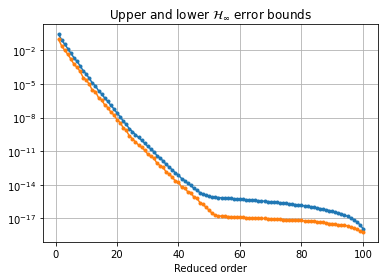

In [11]:
error_bounds = bt.error_bounds()
fig, ax = plt.subplots()
ax.semilogy(range(1, len(error_bounds) + 1), error_bounds, '.-')
ax.semilogy(range(1, len(hsv)), hsv[1:], '.-')
ax.set_xlabel('Reduced order')
_ = ax.set_title(r'Upper and lower $\mathcal{H}_\infty$ error bounds')

In [12]:
rom = bt.reduce(10)

Accordion(children=(HTML(value='', layout=Layout(height='16em', overflow_y='auto', width='100%')),), selected_…

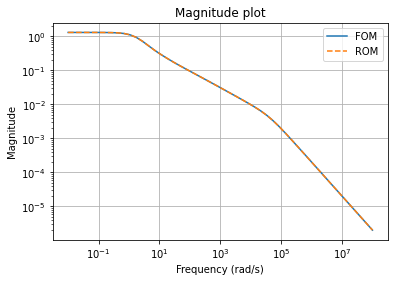

In [13]:
fig, ax = plt.subplots()
fom.mag_plot(w, ax=ax, label='FOM')
rom.mag_plot(w, ax=ax, linestyle='--', label='ROM')
_ = ax.legend()

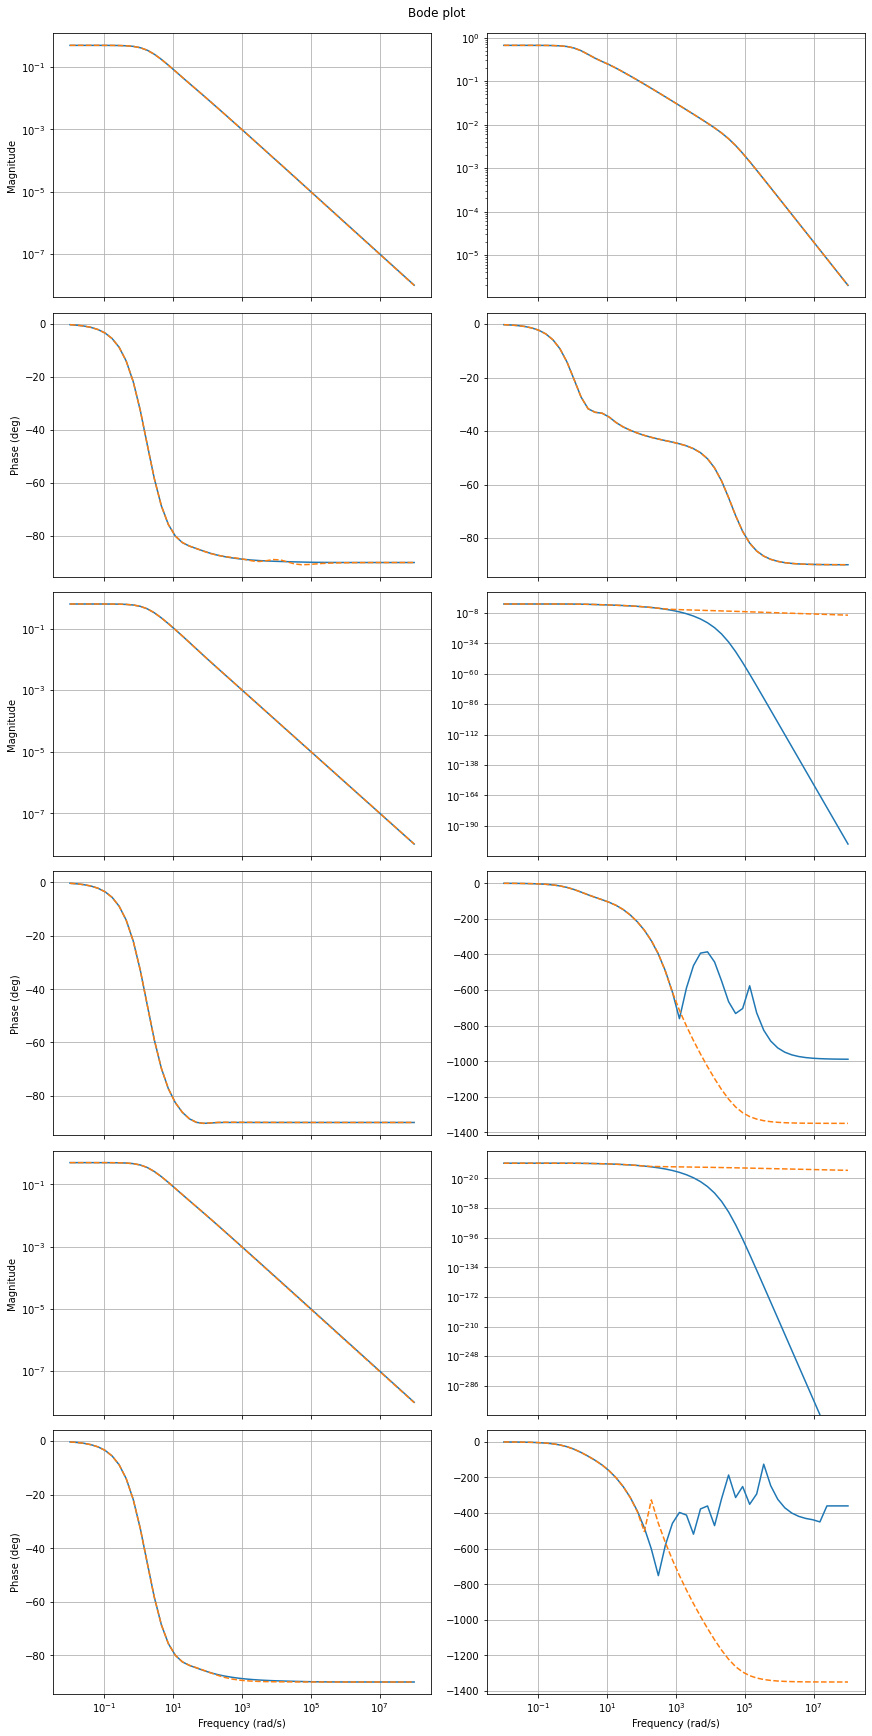

In [14]:
fig, axs = plt.subplots(6, 2, figsize=(12, 24), sharex=True, constrained_layout=True)
fom.bode_plot(w, ax=axs)
_ = rom.bode_plot(w, ax=axs, linestyle='--')

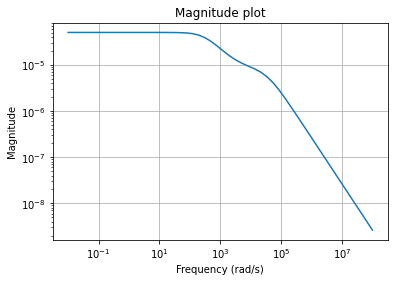

In [15]:
err = fom - rom
_ = err.mag_plot(w)

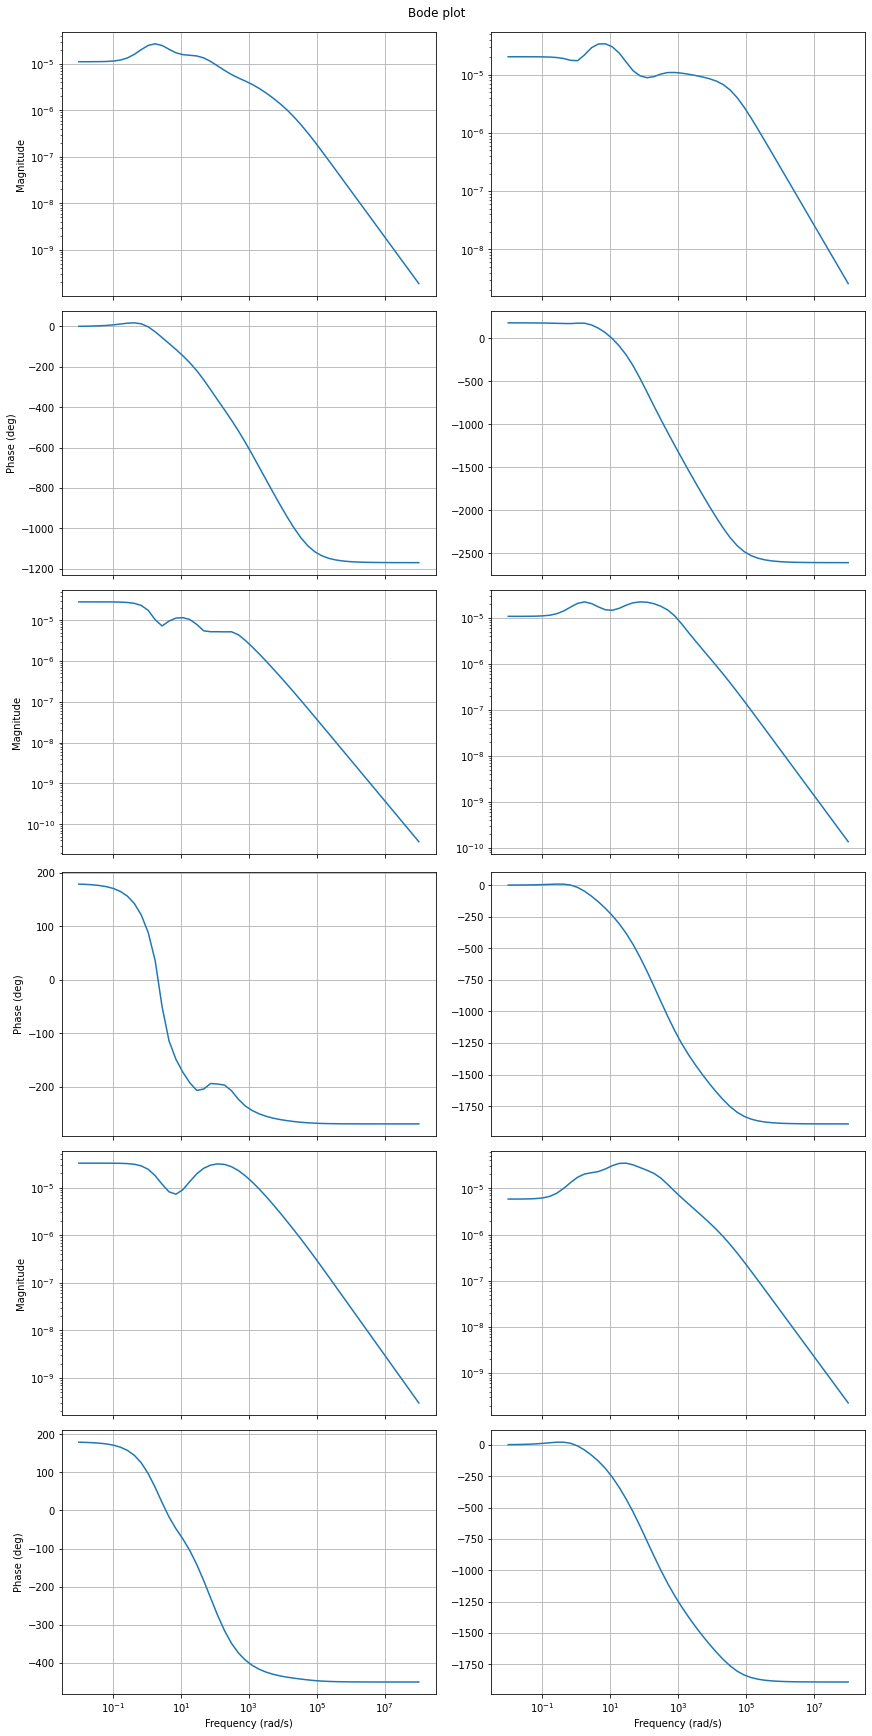

In [16]:
_ = err.bode_plot(w)

In [17]:
print(f'Relative Hinf error: {err.hinf_norm() / fom.hinf_norm():.3e}')
print(f'Relative H2 error:   {err.h2_norm() / fom.h2_norm():.3e}')

Relative Hinf error: 3.702e-05
Relative H2 error:   6.399e-04
